In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("DataMix.csv", sep = ';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NO      2011 non-null   int64 
 1   HARGA   2011 non-null   int64 
 2   LB      2011 non-null   int64 
 3   LT      2011 non-null   int64 
 4   KT      2011 non-null   int64 
 5   KM      2011 non-null   int64 
 6   GRS     2011 non-null   object
dtypes: int64(6), object(1)
memory usage: 110.1+ KB


In [4]:
df.describe()

,NO,HARGA,LB,LT,KT,KM
count,2011.000000,2.011000e+03,2011.000000,2011.000000,2011.000000,2011.000000
mean,1006.000000,1.252982e+10,381.436101,383.312780,4.563401,3.773247
std,580.670015,1.632325e+10,359.200567,421.966604,1.803350,1.685850
min,1.000000,4.300000e+08,38.000000,22.000000,1.000000,1.000000
25%,503.500000,4.000000e+09,196.000000,141.500000,4.000000,3.000000
50%,1006.000000,7.500000e+09,300.000000,248.000000,4.000000,4.000000
75%,1508.500000,1.550000e+10,500.000000,472.000000,5.000000,4.000000
max,2011.000000,2.500000e+11,10000.000000,6790.000000,27.000000,27.000000


In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
label_encode = LabelEncoder()
df.loc[:,'GRS'] = label_encode.fit_transform(df.loc[:,'GRS'])
df

,NO,HARGA,LB,LT,KT,KM,GRS
0,1,3800000000,220,220,3,3,1
1,2,4600000000,180,137,4,3,0
2,3,3000000000,267,250,4,4,0
3,4,430000000,40,25,2,2,1
4,5,9000000000,400,355,6,5,0
...,...,...,...,...,...,...,...
2006,2007,16000000000,550,488,6,5,0
2007,2008,4500000000,270,209,4,4,0
2008,2009,29000000000,400,692,4,3,1
2009,2010,1700000000,140,102,4,3,1


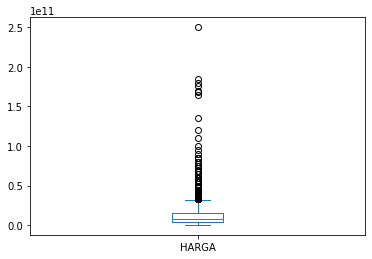

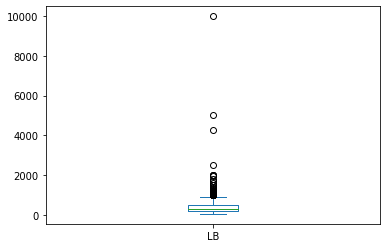

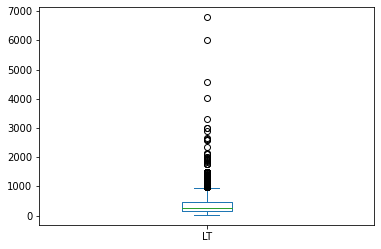

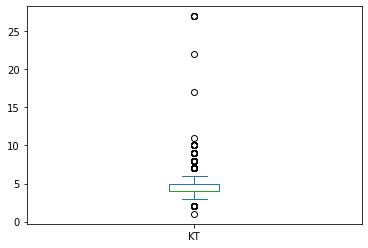

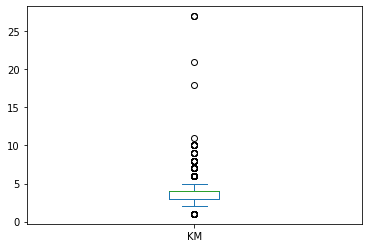

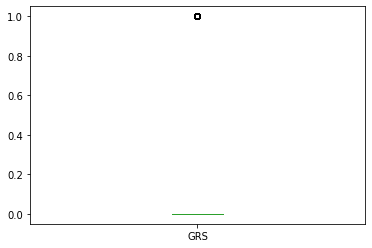

In [40]:
bwp_columns = ['HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS']

for i in bwp_columns:
    df.loc[:, [i]].plot(kind = 'box', sharex = False, sharey = False)

<AxesSubplot:>

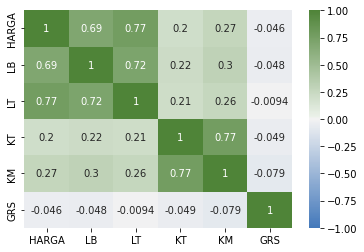

In [7]:
import seaborn as sb

korelasi = df.iloc[:,[1,2,3,4,5,6]].corr()
sb.heatmap(korelasi, 
            xticklabels = korelasi.columns,
            yticklabels = korelasi.columns,
            cmap = sb.diverging_palette(h_neg=250, h_pos=120, sep=3, as_cmap=True),
            vmin = -1,
            vmax = 1,
            annot = True
            )

In [8]:
df.columns.values

array(['NO', 'HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS'], dtype=object)

In [9]:
for i in range(2,7):
    x = df.loc[:, df.columns.values[i]]
    y = df.loc[:, 'HARGA']
    print("Covariance of {} and {}".format('HARGA', df.columns.values[i]))
    print(np.cov(list(x), list(y))[0][1])

Covariance of HARGA and LB
4061933468486.8057
Covariance of HARGA and LT
5327089668205.516
Covariance of HARGA and KT
5870632885.77855
Covariance of HARGA and KM
7502007360.009331
Covariance of HARGA and GRS
-285111922.2110003


In [10]:
X = df[['LB', 'LT', 'KT', 'KM']]
y = df.HARGA

In [11]:
X

,LB,LT,KT,KM
0,220,220,3,3
1,180,137,4,3
2,267,250,4,4
3,40,25,2,2
4,400,355,6,5
...,...,...,...,...
2006,550,488,6,5
2007,270,209,4,4
2008,400,692,4,3
2009,140,102,4,3


In [12]:
for column in X.columns:
    print("", X[column].mean(), X[column].std())
    X.loc[:, column] = (X.loc[:, column] - X.loc[:, column].mean()) / X.loc[:, column].std()

X

 381.4361014420686 359.20056658411033
 383.3127797115863 421.96660419457726
 4.56340129288911 1.80335043836757
 3.773247140726007 1.685849903933497


C:\Users\ASUS TUF\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,LB,LT,KT,KM
0,-0.449432,-0.387028,-0.866943,-0.458669
1,-0.560790,-0.583726,-0.312419,-0.458669
2,-0.318586,-0.315932,-0.312419,0.134504
3,-0.950544,-0.849150,-1.421466,-1.051842
4,0.051681,-0.067097,0.796628,0.727676
...,...,...,...,...
2006,0.469275,0.248094,0.796628,0.727676
2007,-0.310234,-0.413096,-0.312419,0.134504
2008,0.051681,0.731544,-0.312419,-0.458669
2009,-0.672148,-0.666671,-0.312419,-0.458669


In [13]:
y

0        3800000000
1        4600000000
2        3000000000
3         430000000
4        9000000000
           ...     
2006    16000000000
2007     4500000000
2008    29000000000
2009     1700000000
2010     1250000000
Name: HARGA, Length: 2011, dtype: int64

In [14]:
print("Sebelum normalisasi", y.mean(), y.std())

Sebelum normalisasi 12529821426.753855 16323248921.26816


In [15]:
y = (y - y.mean()) / y.std()

In [16]:
X

,LB,LT,KT,KM
0,-0.449432,-0.387028,-0.866943,-0.458669
1,-0.560790,-0.583726,-0.312419,-0.458669
2,-0.318586,-0.315932,-0.312419,0.134504
3,-0.950544,-0.849150,-1.421466,-1.051842
4,0.051681,-0.067097,0.796628,0.727676
...,...,...,...,...
2006,0.469275,0.248094,0.796628,0.727676
2007,-0.310234,-0.413096,-0.312419,0.134504
2008,0.051681,0.731544,-0.312419,-0.458669
2009,-0.672148,-0.666671,-0.312419,-0.458669


In [17]:
y

0      -0.534809
1      -0.485799
2      -0.583819
3      -0.741263
4      -0.216245
          ...   
2006    0.212591
2007   -0.491925
2008    1.009001
2009   -0.663460
2010   -0.691028
Name: HARGA, Length: 2011, dtype: float64

In [18]:
X.isna().any().any()

False

In [19]:
y.isna().any().any()

False

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 0)

In [21]:
# X_train

In [22]:
# y_train

In [23]:
# X_test

In [24]:
# y_test

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train.values.ravel())

LinearRegression()

In [26]:
predict_test = model.predict(X_test)
# abs(predict_test)
print("Test Score : " + str(model.score(X_test, y_test)))

Test Score : 0.5701117601538825


In [27]:
predict_train = model.predict(X_train)
# abs(predict_train)
print("Train Score : " + str(model.score(X_train, y_train)))

Train Score : 0.6609139901712071


In [28]:
def PRINT(a,b):
    print(str.ljust(a, 35), b)

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [30]:
print("MAE, MSE, RMSE, R2 Score for Testing Data")
PRINT("MAE (Mean Absolute Error)", mean_absolute_error(y_test, predict_test))
PRINT("MSE (Mean Squared Error)", mean_squared_error(y_test, predict_test))
PRINT("RMSE (Root of Mean Squared Error)", mean_squared_error(y_test, predict_test, squared = False))
PRINT("R2 (R2 Score)", r2_score(y_test, predict_test))

MAE, MSE, RMSE, R2 Score for Testing Data
MAE (Mean Absolute Error)           0.2675510563148831
MSE (Mean Squared Error)            0.38440775732771065
RMSE (Root of Mean Squared Error)   0.6200062558778828
R2 (R2 Score)                       0.5701117601538825


In [31]:
print("MAE, MSE, RMSE, R2 Score for Training Data")
PRINT("MAE (Mean Absolute Error)", mean_absolute_error(y_train, predict_train))
PRINT("MSE (Mean Squared Error)", mean_squared_error(y_train, predict_train))
PRINT("RMSE (Root of Mean Squared Error)", mean_squared_error(y_train, predict_train, squared = False))
PRINT("R2 (R2 Score)", r2_score(y_train, predict_train))

MAE, MSE, RMSE, R2 Score for Training Data
MAE (Mean Absolute Error)           0.2720203084072337
MSE (Mean Squared Error)            0.3922558215549916
RMSE (Root of Mean Squared Error)   0.6263032983746706
R2 (R2 Score)                       0.6609139901712071


In [32]:
koefisien = model.coef_
for i in koefisien:
    print(i)

0.37210847216041837
0.6509273591933307
-0.041073854049557594
0.047985319817969156


In [33]:
model.intercept_

0.004877398351060949

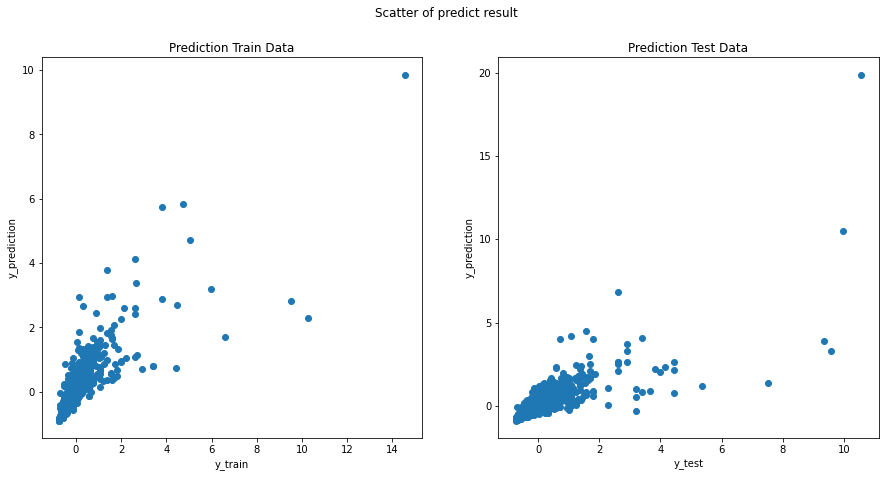

In [34]:
import matplotlib.pyplot as plt
fig, (x1, x2) = plt.subplots(1, 2, figsize = (15, 7))
fig.suptitle('Scatter of predict result')
x1.scatter(y_train, predict_train)
x1.set_title('Prediction Train Data')
x1.set_ylabel('y_prediction')
x1.set_xlabel('y_train')
x2.scatter(y_test, predict_test)
x2.set_title('Prediction Test Data')
x2.set_ylabel('y_prediction')
x2.set_xlabel('y_test')
plt.show()

In [35]:
import pickle

In [36]:
filename = "model.sav"
pickle.dump(model, open(filename, 'wb'))